In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
import scipy.stats as stats

In [2]:
middle_df = pd.read_pickle('middle_df1.pkl')

In [3]:
middle_df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.114500e+04,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0,11145.0
mean,4.676880e+09,513097.0,3.0,2.0,2036.0,15304.0,2.0,3.0,8.0,1738.0,291.0,1971.0,58.0,98081.0,48.0,-122.0,1963.0,12971.0
std,2.872307e+09,107887.0,1.0,1.0,679.0,41341.0,1.0,1.0,1.0,673.0,412.0,30.0,334.0,50.0,0.0,0.0,543.0,27733.0
min,1.200019e+06,350500.0,1.0,1.0,530.0,520.0,1.0,1.0,4.0,480.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,750.0
25%,2.254501e+09,421000.0,3.0,2.0,1530.0,4640.0,1.0,3.0,7.0,1220.0,0.0,1951.0,0.0,98034.0,48.0,-122.0,1540.0,4770.0
50%,4.016800e+09,499500.0,3.0,2.0,1970.0,7200.0,2.0,3.0,8.0,1570.0,0.0,1977.0,0.0,98074.0,48.0,-122.0,1880.0,7214.0
75%,7.424100e+09,595000.0,4.0,2.0,2470.0,10358.0,2.0,4.0,8.0,2174.0,570.0,1999.0,0.0,98117.0,48.0,-122.0,2330.0,9898.0
max,9.895000e+09,749999.0,33.0,8.0,5774.0,1651359.0,4.0,5.0,11.0,5450.0,2196.0,2015.0,2015.0,98199.0,48.0,-121.0,4440.0,438213.0


In [4]:
outcome = 'price'
x_cols = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = ols(formula=f, data=middle_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     573.3
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:21:28   Log-Likelihood:            -1.4393e+05
No. Observations:               11145   AIC:                         2.879e+05
Df Residuals:                   11140   BIC:                         2.879e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.112e+05   8604.057     24.546      0.000    1.94e+05    2.28e+05
bathrooms      -1.19e+04   1939.046     -6.139      0.000   -1.57e+04   -8103.338
grade          2.984e+04   1419.579     21.021      0.000    2.71e+04    3.26e+04
sqft_living      32.6160      2.192     14.882      0.000      28.320      36.912
sqft_living15    16.7306      2.422      6.909      0.000      11.984      21.478
==============================================================================
Omnibus:                      455.796   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.719
Skew:                           0.279   Prob(JB):                     2.24e-65
Kurtosis:                       2.425   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Remove Outliers

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


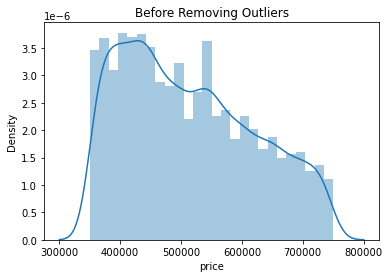

In [5]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(middle_df['price'])
plt.show()

In [6]:
count = 0
price_outliers = []
mean = np.mean(middle_df['price'])
max_distance = np.std(middle_df['price']) * 1

for idx, row in middle_df['price'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        middle_df.drop(idx, inplace=True)
count

4406

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


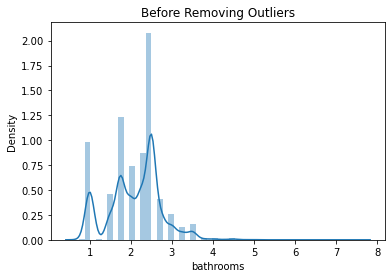

In [7]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(middle_df['bathrooms'])
plt.show()

In [8]:
count = 0
price_outliers = []
mean = np.mean(middle_df['bathrooms'])
max_distance = np.std(middle_df['bathrooms']) * 3

for idx, row in middle_df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        middle_df.drop(idx, inplace=True)
count

26

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


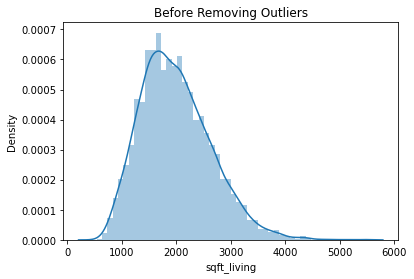

In [9]:
plt.title('Before Removing Outliers')
sns.distplot(middle_df['sqft_living'])
plt.show()

In [10]:
count = 0
price_outliers = []
mean = np.mean(middle_df['sqft_living'])
max_distance = np.std(middle_df['sqft_living']) * 3

for idx, row in middle_df['sqft_living'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        middle_df.drop(idx, inplace=True)
count

41

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


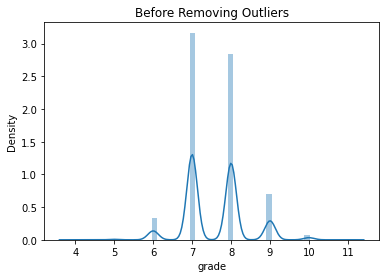

In [11]:
plt.title('Before Removing Outliers')
sns.distplot(middle_df['grade'])
plt.show()

In [12]:
count = 0
price_outliers = []
mean = np.mean(middle_df['grade'])
max_distance = np.std(middle_df['grade']) * 3

for idx, row in middle_df['grade'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        middle_df.drop(idx, inplace=True)
count

94

In [13]:
middle_df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.578000e+03,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0
mean,4.756324e+09,502200.0,3.0,2.0,1968.0,15184.0,2.0,3.0,8.0,1666.0,295.0,1971.0,59.0,98080.0,48.0,-122.0,1922.0,12984.0
std,2.870080e+09,60871.0,1.0,1.0,607.0,39286.0,1.0,1.0,1.0,612.0,402.0,30.0,339.0,49.0,0.0,0.0,496.0,27836.0
min,5.200087e+06,405300.0,1.0,1.0,620.0,638.0,1.0,1.0,6.0,590.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,788.0
25%,2.391603e+09,449950.0,3.0,2.0,1520.0,4518.0,1.0,3.0,7.0,1210.0,0.0,1950.0,0.0,98034.0,48.0,-122.0,1530.0,4635.0
50%,4.037000e+09,499000.0,3.0,2.0,1910.0,7053.0,2.0,3.0,8.0,1520.0,0.0,1976.0,0.0,98074.0,48.0,-122.0,1850.0,7182.0
75%,7.518502e+09,550000.0,4.0,2.0,2370.0,10148.0,2.0,4.0,8.0,2040.0,580.0,1998.0,0.0,98117.0,48.0,-122.0,2260.0,9750.0
max,9.842300e+09,620047.0,11.0,4.0,3920.0,1074218.0,4.0,5.0,9.0,3906.0,1850.0,2015.0,2015.0,98199.0,48.0,-121.0,3790.0,438213.0


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

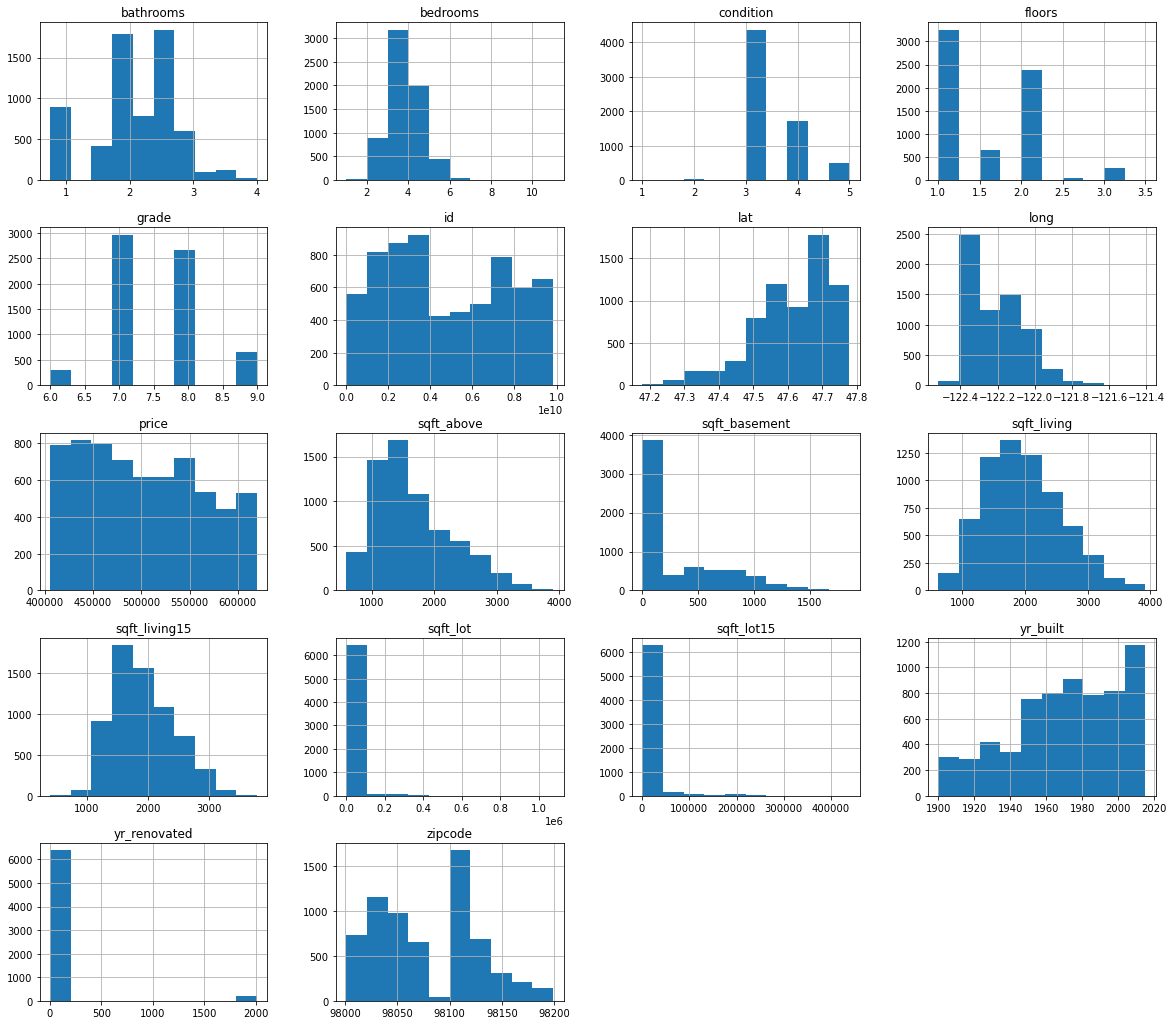

In [14]:
middle_df.hist(figsize = (20,18));

# Normalize and Scale

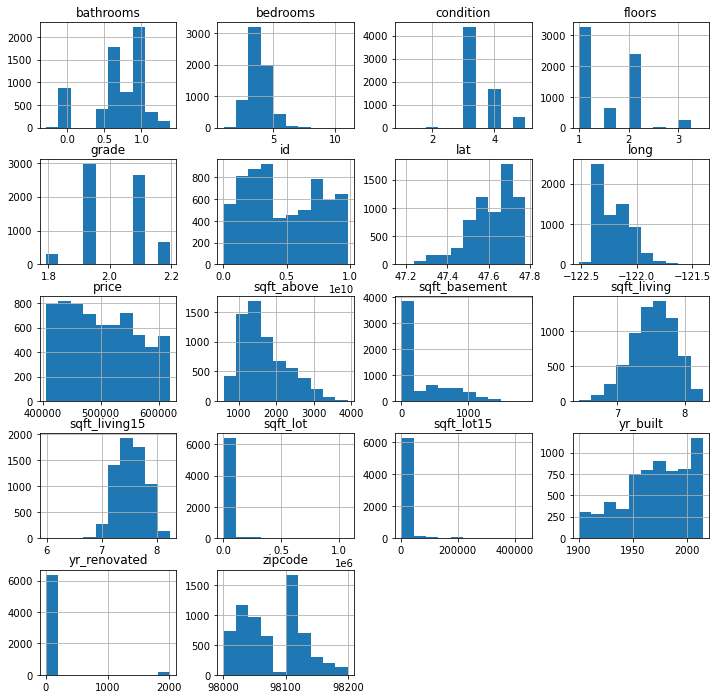

In [15]:
middle_df['sqft_living'] = np.log(middle_df['sqft_living'])
middle_df['grade'] = np.log(middle_df['grade'])
middle_df['sqft_living15'] = np.log(middle_df['sqft_living15'])
middle_df['bathrooms'] = np.log(middle_df['bathrooms'])
middle_df.hist(figsize  = [12, 12]);

In [38]:
middle_df['bathrooms'].mean()

0.6875500741751333

In [16]:
middle_df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.578000e+03,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0,6578.0
mean,4.756324e+09,502200.0,3.0,1.0,8.0,15184.0,2.0,3.0,2.0,1666.0,295.0,1971.0,59.0,98080.0,48.0,-122.0,8.0,12984.0
std,2.870080e+09,60871.0,1.0,0.0,0.0,39286.0,1.0,1.0,0.0,612.0,402.0,30.0,339.0,49.0,0.0,0.0,0.0,27836.0
min,5.200087e+06,405300.0,1.0,-0.0,6.0,638.0,1.0,1.0,2.0,590.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,6.0,788.0
25%,2.391603e+09,449950.0,3.0,1.0,7.0,4518.0,1.0,3.0,2.0,1210.0,0.0,1950.0,0.0,98034.0,48.0,-122.0,7.0,4635.0
50%,4.037000e+09,499000.0,3.0,1.0,8.0,7053.0,2.0,3.0,2.0,1520.0,0.0,1976.0,0.0,98074.0,48.0,-122.0,8.0,7182.0
75%,7.518502e+09,550000.0,4.0,1.0,8.0,10148.0,2.0,4.0,2.0,2040.0,580.0,1998.0,0.0,98117.0,48.0,-122.0,8.0,9750.0
max,9.842300e+09,620047.0,11.0,1.0,8.0,1074218.0,4.0,5.0,2.0,3906.0,1850.0,2015.0,2015.0,98199.0,48.0,-121.0,8.0,438213.0


In [17]:
check_skew=middle_df.dtypes[middle_df.dtypes!='object'].index

In [18]:
skew_feats=middle_df[check_skew].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})

In [19]:
skew_feats

sqft_lot         9.483977
sqft_lot15       6.476997
yr_renovated     5.532939
condition        1.150792
sqft_basement    1.129948
sqft_above       0.834907
floors           0.745613
long             0.736176
bedrooms         0.548155
zipcode          0.242687
price            0.217405
id               0.172784
grade           -0.036239
sqft_living15   -0.036365
sqft_living     -0.311001
yr_built        -0.492720
bathrooms       -0.850497
lat             -0.853317
dtype: float64

In [20]:
middle_df['price'].skew()

0.21740470973471265

In [21]:
middle_df['price'] = np.log(middle_df['price'])

In [22]:
middle_df['price'].skew()

0.07365076235322751

In [23]:
middle_df['price'] = np.sqrt(middle_df['price'])

In [24]:
middle_df['price'].skew()

0.06820621071023797

In [25]:
price_fix = stats.boxcox(middle_df['price'])[0]
pd.Series(price_fix).skew()

0.0

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


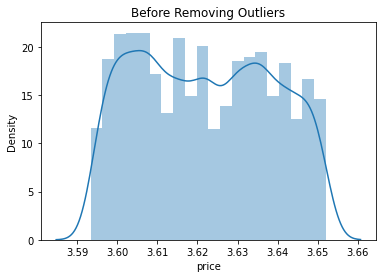

In [26]:
plt.title('Before Removing Outliers')
sns.distplot(middle_df['price'])
plt.show()

# Model (fixed)

In [40]:
outcome = 'price'
x_cols = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model2 = ols(formula=f, data=middle_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     120.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.57e-99
Time:                        22:32:16   Log-Likelihood:                 17827.
No. Observations:                6578   AIC:                        -3.564e+04
Df Residuals:                    6573   BIC:                        -3.561e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4847      0.007    482.642      0.000       3.471       3.499
bathrooms        -0.0034      0.001     -4.260      0.000      -0.005      -0.002
grade             0.0264      0.003     10.505      0.000       0.021       0.031
sqft_living       0.0077      0.001      8.040      0.000       0.006       0.010
sqft_living15     0.0038      0.001      3.684      0.000       0.002       0.006
==============================================================================
Omnibus:                     1869.610   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.144
Skew:                           0.037   Prob(JB):                     1.81e-65
Kurtosis:                       1.960   Cond. No.                         401.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# QQ Plot

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


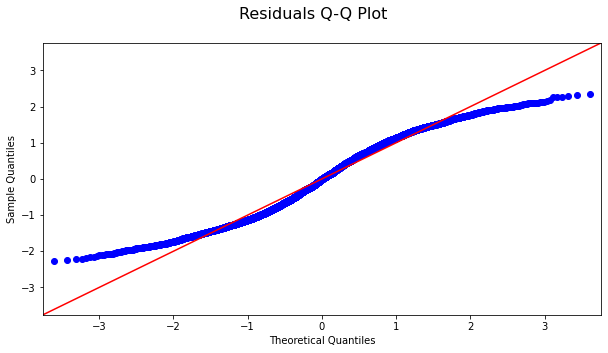

In [28]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

# Homoscedasticity

Text(0.5, 0.99, 'Residuals Scatterplot')

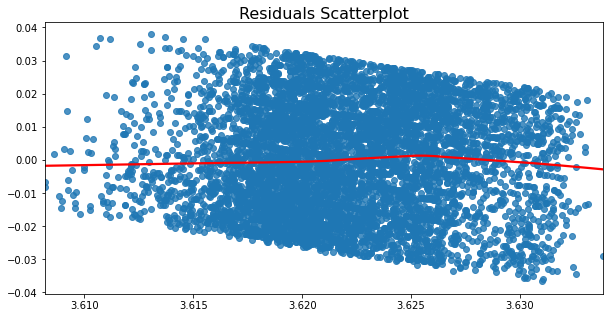

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(x=model2.predict(), y=model2.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

# Model Validation

In [30]:
from sklearn.model_selection import train_test_split

X = middle_df.drop(['price', 'bedrooms', 'id','date','zipcode','lat','long','class_scale','sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'condition', 'yr_built', 'yr_renovated', 'sqft_lot15'], axis=1)
y = middle_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X)

       bathrooms  sqft_living     grade  sqft_living15
1       0.810930     7.851661  1.945910       7.432484
3       1.098612     7.580700  1.945910       7.215240
4       0.693147     7.426549  2.079442       7.495542
11      0.000000     7.056175  1.945910       7.192934
14      0.693147     7.501082  1.945910       7.215240
...          ...          ...       ...            ...
21585   0.916291     7.261927  2.079442       7.158514
21587   0.916291     7.727535  2.079442       7.727535
21588   0.693147     7.306531  2.079442       7.244228
21589   0.916291     7.832014  2.197225       7.832014
21591   0.916291     7.177782  2.079442       7.192934

[6578 rows x 4 columns]


In [31]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

4933 1645 4933 1645


In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [34]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [35]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0002582054439806347
Test Mean Squarred Error: 0.0002624085192730663
